# 1.Warm up

In [10]:
using JuMP, Clp, ECOS, SCS

m = Model()

@variable(m, 0 <= x[1:3] <= 3)    
@constraint(m, 2x[1] >= x[2]+x[3])       
@objective(m, Max, 5x[1]-x[2]+11x[3])         

setsolver(m, ClpSolver())
@time(
for i in 1:1000
    status = solve(m)
end)
println(status)
println(getvalue(x))

setsolver(m, ECOSSolver(verbose=0))
@time(
for i in 1:1000
    status = solve(m)
end)
println(status)
println(getvalue(x))

setsolver(m, SCSSolver(verbose=0))
@time(
for i in 1:1000
    status = solve(m)
end)
println(status)
println(getvalue(x))

  0.229876 seconds (36.03 k allocations: 2.413 MiB)
Optimal
[3.0, 0.0, 3.0]
  0.297667 seconds (489.09 k allocations: 27.915 MiB, 1.82% gc time)
Optimal
[3.0, 8.22327e-9, 3.0]
  2.647056 seconds (1.18 M allocations: 62.263 MiB, 1.26% gc time)
Optimal
[2.99999, 4.14972e-6, 3.00001]


### Answer
Clp is the most accurate, while SCS is the most inaccurate solver. 

Clp is the fastest, while ECOS is the slowest.
##### Reasons
Accuracy: The reason can be the different algorithms that the solvers are using. For instance, SCS is based on alternating direction method of multipliers (ADMM), while Clp uses Simplex method, which is an exact algorithm for Linear Programming problem.

Speed: The most important reason should be the tradeoff between generality and speed of the solvers. For instance, Clp is only capable of solving LP, while ECOS can solve LP and SOCP, and SCS can solve SODP in addition. 

# 2. Corp planning

(a)

In [3]:
using JuMP, Clp

m = Model(solver = ClpSolver())
         
@variable(m, 0 <= w <= 45)           # wheat
@variable(m, 0 <= c <= 45)           # corn
@constraint(m, w + c <= 45)           # total acre of land avaible
@constraint(m, 3w + 2c <= 100)       # total number of worker
@constraint(m, 2w + 4c <= 120)       # total amount of fertilizer
@objective(m, Max, 200w + 300c)      # maximize profit

status = solve(m)

println(status)
println("Plant ", getvalue(w), " acres of wheat.")
println("Plant ", getvalue(c), " acres of corn.")
println("Total profit will be \$", getobjectivevalue(m))

Optimal
Plant 19.99999999999999 acres of wheat.
Plant 20.000000000000007 acres of corn.
Total profit will be $10000.0


(b)

Problem Data

In [5]:
# the types of crops plant
crops = [:wheat, :corn]

# resources involved
resources = [:land, :labor, :fertilizer]

# profits returned (for each crop)
profit = Dict( zip( crops, [ 200, 300 ] ) )

# quantities available (for each resource)
quant_avail = Dict( zip( resources, [ 45, 100, 120 ] ) )

# recipes (crops, resources)
using NamedArrays
recipe_mat = [ 1 3 2 
               1 2 4 ]
recipe = NamedArray( recipe_mat, (crops,resources), ("crops","resources",) )
;

Problem Model

In [6]:
using JuMP, Clp
m = Model(solver = ClpSolver())

@variable(m, 0 <= Plant[crops] <= 45 )
@expression(m, total_profit, sum( profit[c]*Plant[c] for c in crops) )
@constraint(m, constr[ r in resources], sum( recipe[c,r]*Plant[c] for c in crops ) <= quant_avail[r] )
@objective(m, Max, total_profit )

solve(m)
println(getvalue(Plant))
println("Total profit is: \$", getvalue(total_profit))

Plant: 1 dimensions:
[wheat] = 19.99999999999999
[ corn] = 20.000000000000007
Total profit is: $10000.0


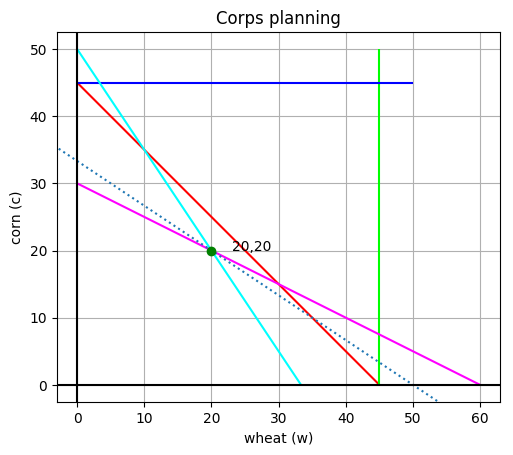

PyObject <matplotlib.lines.Line2D object at 0x13f263ed0>

In [10]:
using PyPlot
# First Segment Group
xs = [45,0]
ys = [0,45]
lines = Any[collect(zip(xs,ys))]
# lines = [(1.0,2.0),(3.0,4.0),(5.0,0.06),(0.0,0.0)]

# Second Segment Group
xs = [45,45]
ys = [0,50]
push!(lines,collect(zip(xs,ys)))

# Third Segment Group
xs = [0,50]
ys = [45.,45]
push!(lines,collect(zip(xs,ys)))

xs = [100/3,0]
ys = [0,50]
push!(lines,collect(zip(xs,ys)))

xs = [0,60]
ys = [30.,0]
push!(lines,collect(zip(xs,ys)))

c = Vector{Int}[[1,0,0],[0,1,0],[0,0,1],[0,1,1],[1,0,1]] # Colors

# Assemble everything into a LineCollection
line_segments = matplotlib[:collections][:LineCollection](lines,colors=c)

fig = figure("Corp Planning")
ax = axes()
ax[:add_collection](line_segments)
axis("image")
grid("on")
xlabel("wheat (w)")
ylabel("corn (c)")
title("Corps planning")
x = linspace(-100,1000,1000); 
y = 100/3 - (2/3)x
plot(x,y,linestyle=":")
plot(20,20,"go")
ax[:text](23, 20, "20,20")
ax[:axhline](y=0, color="k")
ax[:axvline](x=0, color="k")